In [11]:
import os
import pandas as pd

In [12]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})

In [13]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [14]:
df.loc[df["AAA"] <= 6, "BBB"]
# Selecting the rows of BBB where the corresponding item on AAA is <= 6
# Since this is a view, we could mutate this is we wanted to

0    10
1    20
2    30
Name: BBB, dtype: int64

In [15]:
# Let's save our table
df.to_pickle('df.pkl')

In [16]:
# Just to test, let's reload it
pd.read_pickle('df.pkl')

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [17]:
# Yup, it's the same. We can also compress our pickle
df.to_pickle('df.pkl.zip')  # Compressed automatically by Pandas

In [18]:
# Pandas can also save to msgpack, which is supposedly very space efficient
# Caveat: The docs says this format is likely to be optimized in the future
# and therefore is considered not stable
df.to_msgpack('df.msg')

In [19]:
# And to json
df.to_json('df.json')

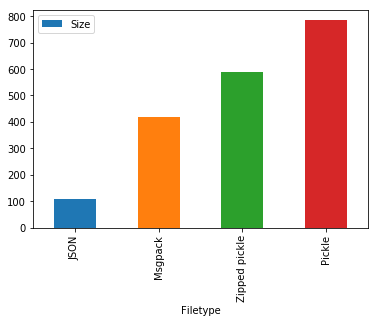

In [20]:
# Let's compare file sizes
def get_sizes():
    return pd.DataFrame(
        {
            "Size": [os.path.getsize(x) for x in ['df.json', 'df.msg', 'df.pkl.zip', 'df.pkl']],
            "Filetype": ["JSON", "Msgpack", "Zipped pickle", "Pickle"]
        }
    )
plot_sizes = {'kind': 'bar', 'x': 'Filetype', 'y': 'Size'}
get_sizes().plot(**plot_sizes)

In [11]:
# Looks like JSON was the smallest. Let's try a bigger table.
df = pd.read_csv('10000 Sales Records.csv')

In [12]:
def save_all_types(df):
    df.to_json('df.json')
    df.to_msgpack('df.msg')
    df.to_pickle('df.pkl.zip')
    df.to_pickle('df.pkl')

save_all_types(df)

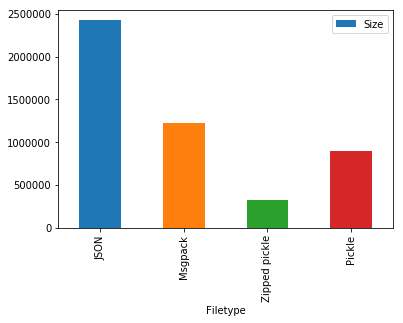

In [13]:
before_stats = get_sizes()
before_stats.plot(**plot_sizes)

In [14]:
# Here we can see the zipped pickle is the smallest.
# Let's see if categorizing the DataFrame changes anything.
df = pd.read_csv('10000 Sales Records.csv')

In [15]:
for col in ["Item Type", "Region", "Country", "Order Priority", "Sales Channel"]:
    df[col] = df[col].astype('category')

In [16]:
save_all_types(df)

In [17]:
after_stats = get_sizes()
after_stats.sort_values("Size", ascending=True)

,Size,Filetype
2,317519,Zipped pickle
3,762429,Pickle
1,823109,Msgpack
0,2421362,JSON


In [18]:
stats_df = pd.DataFrame(
    {
        "Size before categorizing": before_stats["Size"],
        "Size after categorizing": after_stats["Size"],
        "Filetype": before_stats["Filetype"]
    }
)

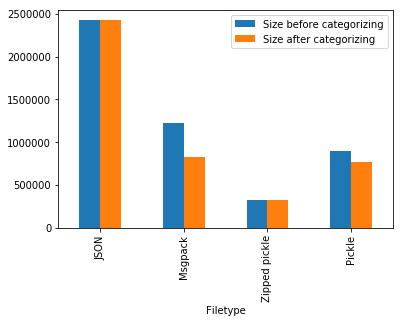

In [19]:
stats_df.plot(
    kind='bar',
    x='Filetype',
    y=['Size before categorizing', 'Size after categorizing']
)

In [20]:
# Nice graph. Let's go over the key observances:
# Msgpack saw the biggest improvement from categorization
# Zipped pickle is the smallest by a landslide
# JSON is the largest by a landslide